In [2]:
!pip install pycaret

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Preparation

In [4]:
data = pd.read_csv('/content/sample_data/Jala Test - Survival Rate 5.csv')
data

,id,pond_id,species_id,total_seed,started_at,finished_at,remark,created_at,updated_at,area,...,harvested_at,status,selling_price,status_cleaned,rn_harvest,total_harvest,survival_rate%,panen_status,total_fasting,avg_feed_quantity
0,3458,12969,NaN,566669,2020-03-07 00:00:00.000,2020-06-27 00:00:00.000,NaN,2020-02-19 08:44:53.000,2020-07-04 00:03:56.000,4968.0,...,2020-06-27,Full,NaN,Full,1,124230.0000,22.0,Parsial,0,89.97
1,3458,12969,NaN,566669,2020-03-07 00:00:00.000,2020-06-27 00:00:00.000,NaN,2020-02-19 08:44:53.000,2020-07-04 00:03:56.000,4968.0,...,2020-06-13,Partial,NaN,Partial,1,59094.0000,10.0,Parsial,0,89.97
2,3458,12969,NaN,566669,2020-03-07 00:00:00.000,2020-06-27 00:00:00.000,NaN,2020-02-19 08:44:53.000,2020-07-04 00:03:56.000,4968.0,...,2020-05-26,Partial,NaN,Partial,1,106769.8050,19.0,Parsial,0,89.97
3,3458,12969,NaN,566669,2020-03-07 00:00:00.000,2020-06-27 00:00:00.000,NaN,2020-02-19 08:44:53.000,2020-07-04 00:03:56.000,4968.0,...,2020-05-13,Partial,NaN,Partial,1,154454.2200,27.0,Parsial,0,89.97
4,3459,12996,NaN,566669,2020-03-07 00:00:00.000,2020-07-06 00:00:00.000,NaN,2020-02-19 09:47:52.000,2020-07-13 00:16:30.000,4968.0,...,2020-07-06,Full,NaN,Full,1,116334.6600,21.0,Parsial,0,90.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,29659,45493,1.0,75000,2024-02-11 00:00:00.000,2024-03-14 00:00:00.000,#TBRBanyuwangi2024,2024-02-22 04:06:23.000,2024-03-18 05:50:22.000,2183.0,...,2024-03-14,Full,2100000.0,Full,1,12000.0000,16.0,Full,24,0.35
5747,29679,18522,NaN,26671,2024-02-15 00:00:00.000,2024-03-28 00:00:00.000,NaN,2024-02-22 14:54:50.000,2024-04-04 00:08:03.000,78.5,...,2024-03-28,Full,NaN,Full,1,12194.6000,46.0,Parsial,0,2.16
5748,29679,18522,NaN,26671,2024-02-15 00:00:00.000,2024-03-28 00:00:00.000,NaN,2024-02-22 14:54:50.000,2024-04-04 00:08:03.000,78.5,...,2024-03-12,Partial,NaN,Partial,1,7797.8003,29.0,Parsial,0,2.16
5749,29873,43651,1.0,125000,2024-01-09 00:00:00.000,2024-03-25 00:00:00.000,#TBRPacitan2024,2024-03-05 13:08:44.000,2024-04-04 00:08:11.000,900.0,...,2024-03-25,Full,57401400.0,Full,1,88230.0000,71.0,Full,0,12.41


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5751 non-null   int64  
 1   pond_id                 5751 non-null   int64  
 2   species_id              3785 non-null   float64
 3   total_seed              5751 non-null   int64  
 4   started_at              5751 non-null   object 
 5   finished_at             5751 non-null   object 
 6   remark                  2844 non-null   object 
 7   created_at              5751 non-null   object 
 8   updated_at              5751 non-null   object 
 9   area                    5751 non-null   float64
 10  initial_age             5621 non-null   float64
 11  limit_weight_per_area   5730 non-null   float64
 12  target_cultivation_day  5742 non-null   float64
 13  target_size             5741 non-null   float64
 14  extracted_at            5751 non-null   

# Data Investigation

In [6]:
data.isnull().sum()

,0
id,0
pond_id,0
species_id,1966
total_seed,0
started_at,0
finished_at,0
remark,2907
created_at,0
updated_at,0
area,0


Kolom yang perlu diperhatikan untuk di adjust:
- Remark: **Dihapus**
- initial_age
- limit_weight_per_area
- target_cultivation_day
- target_size
- ordered_at: **Dihapus**
- total_seed_type
- hatchery_name: **Dihapus**
- pond_depth
- status: Di Adjust Ulang
- selling_price: **Dihapus**

In [7]:
# Menambahkan pengecekan untuk nilai selain NaN yang mungkin berbentuk string invalid
invalid_values = ['nan', 'none', 'n/a', 'na']
df_cleaned = data.applymap(lambda x: pd.NA if isinstance(x, str) and x.lower() in invalid_values else x)

df_cleaned.isna().sum()

<ipython-input-7-2516cd5d196f>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = data.applymap(lambda x: pd.NA if isinstance(x, str) and x.lower() in invalid_values else x)


,0
id,0
pond_id,0
species_id,1966
total_seed,0
started_at,0
finished_at,0
remark,2907
created_at,0
updated_at,0
area,0


In [8]:
# Menghapus beberaopa dari DataFrame
data.drop(columns=['species_id','remark', 'ordered_at', 'ordered_at', 'hatchery_id', 'selling_price', 'hatchery_name', 'pond_depth', 'pond_length', 'pond_width', 'pond_name'], inplace=True)

# Data Wrangling

## Perubahan tipe data

In [9]:
# Mengkonversikan kolom waktu menjadi datetime
time_columns = ['finished_at','started_at','created_at', 'updated_at', 'extracted_at', 'ordered_at', 'harvested_at', 'updated_at.1', 'created_at.1']

for col in time_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

# Mengkonversikan data id menjadi tipe data String
id_columns = [col for col in data.columns if 'id' in col]
data[id_columns] = data[id_columns].astype(str)

## Rename Data Column

In [10]:
# Perubahan nama kolom
data.rename(columns={'survival_rate%': 'calculated_sr'}, inplace=True)

## Drop Outlier/Anomali SR

In [11]:
data[data['calculated_sr']>100]

,id,pond_id,total_seed,started_at,finished_at,created_at,updated_at,area,initial_age,limit_weight_per_area,...,id.1,harvested_at,status,status_cleaned,rn_harvest,total_harvest,calculated_sr,panen_status,total_fasting,avg_feed_quantity
50,4349,13222,80000,2020-05-10,2020-07-03,2020-05-11 06:10:50,2020-07-06 04:35:35,1000.0,0.0,1.25,...,2638.0,2020-07-03,Full,Full,1,112000.0,140.0,Full,0,16.33
61,4552,12945,12000,2020-05-29,2020-07-05,2020-06-01 09:37:28,2021-08-19 08:52:30,1000.0,0.0,1.20,...,2340.0,2020-07-05,Full,Full,1,12800.0,107.0,Full,0,0.86
71,4887,12688,62000,2020-06-28,2020-09-03,2020-07-01 13:03:50,2021-07-02 03:34:13,245.0,0.0,1.25,...,2715.0,2020-09-03,Full,Full,1,76500.0,123.0,Full,0,12.57
163,6952,12688,60000,2020-11-26,2021-01-31,2020-11-26 06:24:28,2021-07-02 03:34:13,216.0,0.0,1.25,...,3993.0,2021-01-31,Full,Full,1,72000.0,120.0,Full,7,8.91
165,7127,16716,130000,2020-12-11,2021-02-07,2020-12-12 00:32:11,2021-12-02 02:44:40,735.0,0.0,1.25,...,8498.0,2021-02-07,Full,Full,1,175000.0,135.0,Full,6,15.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5698,29124,45497,20000,2024-01-17,2024-03-23,2024-01-22 10:15:18,2024-03-30 00:06:50,200.0,0.0,1.25,...,28079.0,2024-03-23,Full,Full,1,28500.0,142.0,Full,14,1.06
5700,29130,45751,40000,2024-01-20,2024-03-19,2024-01-22 16:50:38,2024-03-26 00:12:56,3000.0,0.0,1.25,...,27978.0,2024-03-19,NaN,Other,1,14000000.0,35000.0,Parsial,58,0.01
5717,29263,37102,60000,2024-01-22,2024-03-20,2024-01-31 22:33:29,2024-03-21 00:42:59,600.0,0.0,1.25,...,27953.0,2024-03-20,Full,Full,1,70400.0,117.0,Full,0,8.53
5739,29518,38473,40000,2024-02-11,2024-03-30,2024-02-13 07:01:47,2024-04-01 14:39:53,374.0,0.0,1.25,...,28159.0,2024-03-30,Full,Full,1,46200.0,116.0,Full,3,7.62


In [12]:
# Hapus baris dengan survival_rate% > 100
data = data[data['calculated_sr'] <= 100]
data = data.reset_index(drop=True)

data = data.dropna(subset=['harvested_at']).reset_index(drop=True)

## Data Imputation

In [13]:
invalid_values = ['nan', 'none', 'n/a', 'na']
data = data.applymap(lambda x: pd.NA if isinstance(x, str) and x.lower() in invalid_values else x)

data.isna().sum()

<ipython-input-13-e21d7b9910a1>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: pd.NA if isinstance(x, str) and x.lower() in invalid_values else x)


,0
id,0
pond_id,0
total_seed,0
started_at,0
finished_at,0
created_at,0
updated_at,0
area,0
initial_age,124
limit_weight_per_area,21


In [14]:
columns = ['initial_age',
 'limit_weight_per_area',
 'target_cultivation_day',
 'target_size',
 'total_seed_type',
 'pond_length',
 'pond_depth',
 'status']


### DI: initial_age

In [15]:
data[data['initial_age'].isna()]

,id,pond_id,total_seed,started_at,finished_at,created_at,updated_at,area,initial_age,limit_weight_per_area,...,id.1,harvested_at,status,status_cleaned,rn_harvest,total_harvest,calculated_sr,panen_status,total_fasting,avg_feed_quantity
160,7020,12824,90000,2020-11-28,2021-01-15,2020-12-02 01:44:19,2020-12-06 11:46:50,310.0,NaN,NaN,...,3877.0,2021-01-15,NaN,Other,1,37625.0,42.0,Full,0,5.13
270,9057,21898,120000,2021-03-11,2021-05-10,2021-04-03 14:51:56,2021-05-16 07:17:39,636.0,NaN,NaN,...,5153.0,2021-05-10,Full,Full,1,39420.0,33.0,Parsial,0,14.32
271,9057,21898,120000,2021-03-11,2021-05-10,2021-04-03 14:51:56,2021-05-16 07:17:39,636.0,NaN,NaN,...,5080.0,2021-04-29,Partial,Partial,1,54000.0,45.0,Parsial,0,14.32
662,11675,19372,150000,2021-08-26,2021-11-18,2021-08-27 07:49:05,2021-11-23 04:11:35,2000.0,NaN,NaN,...,8159.0,2021-11-18,Full,Full,1,7200.0,5.0,Parsial,0,10.62
663,11675,19372,150000,2021-08-26,2021-11-18,2021-08-27 07:49:05,2021-11-23 04:11:35,2000.0,NaN,NaN,...,7871.0,2021-11-11,Partial,Partial,1,6300.0,4.0,Parsial,0,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,28607,36968,200000,2024-01-01,2024-02-29,2024-01-03 03:06:58,2024-03-12 04:12:27,1156.0,NaN,1.25,...,27078.0,2024-02-15,Partial,Partial,1,48000.0,24.0,Parsial,0,19.93
5480,28608,36969,200000,2024-01-01,2024-02-29,2024-01-03 03:20:37,2024-03-12 04:24:10,1156.0,NaN,1.25,...,27630.0,2024-02-29,Full,Full,1,126000.0,63.0,Parsial,0,21.76
5481,28608,36969,200000,2024-01-01,2024-02-29,2024-01-03 03:20:37,2024-03-12 04:24:10,1156.0,NaN,1.25,...,27252.0,2024-02-23,Partial,Partial,1,28000.0,14.0,Parsial,0,21.76
5482,28608,36969,200000,2024-01-01,2024-02-29,2024-01-03 03:20:37,2024-03-12 04:24:10,1156.0,NaN,1.25,...,27076.0,2024-02-19,Partial,Partial,1,42800.0,21.0,Parsial,0,21.76


### DI: limit_weight_per_area

In [16]:
data.describe()['limit_weight_per_area']

,limit_weight_per_area
count,5584.000000
mean,1.631612
min,0.600000
25%,1.250000
50%,1.250000
75%,1.250000
max,270.000000
std,5.996295


In [17]:
# Melakukan imputasi data pada kolom 'limit_weight_per_area'
data['limit_weight_per_area'].fillna(data['limit_weight_per_area'].median(), inplace=True)

### DI: target_cultivation_day

In [18]:
data.describe()['target_cultivation_day']

,target_cultivation_day
count,5596.000000
mean,114.033417
min,0.000000
25%,100.000000
50%,120.000000
75%,120.000000
max,348.000000
std,20.485539


In [19]:
data[data['target_cultivation_day'].isna()]

,id,pond_id,total_seed,started_at,finished_at,created_at,updated_at,area,initial_age,limit_weight_per_area,...,id.1,harvested_at,status,status_cleaned,rn_harvest,total_harvest,calculated_sr,panen_status,total_fasting,avg_feed_quantity
160,7020,12824,90000,2020-11-28,2021-01-15,2020-12-02 01:44:19,2020-12-06 11:46:50,310.0,NaN,1.25,...,3877.0,2021-01-15,NaN,Other,1,37625.0,42.0,Full,0,5.13
270,9057,21898,120000,2021-03-11,2021-05-10,2021-04-03 14:51:56,2021-05-16 07:17:39,636.0,NaN,1.25,...,5153.0,2021-05-10,Full,Full,1,39420.0,33.0,Parsial,0,14.32
271,9057,21898,120000,2021-03-11,2021-05-10,2021-04-03 14:51:56,2021-05-16 07:17:39,636.0,NaN,1.25,...,5080.0,2021-04-29,Partial,Partial,1,54000.0,45.0,Parsial,0,14.32
662,11675,19372,150000,2021-08-26,2021-11-18,2021-08-27 07:49:05,2021-11-23 04:11:35,2000.0,NaN,1.25,...,8159.0,2021-11-18,Full,Full,1,7200.0,5.0,Parsial,0,10.62
663,11675,19372,150000,2021-08-26,2021-11-18,2021-08-27 07:49:05,2021-11-23 04:11:35,2000.0,NaN,1.25,...,7871.0,2021-11-11,Partial,Partial,1,6300.0,4.0,Parsial,0,10.62
664,11675,19372,150000,2021-08-26,2021-11-18,2021-08-27 07:49:05,2021-11-23 04:11:35,2000.0,NaN,1.25,...,7678.0,2021-11-03,Partial,Partial,1,18000.0,12.0,Parsial,0,10.62
665,11675,19372,150000,2021-08-26,2021-11-18,2021-08-27 07:49:05,2021-11-23 04:11:35,2000.0,NaN,1.25,...,7668.0,2021-11-01,Partial,Partial,1,23125.0,15.0,Parsial,0,10.62
666,11675,19372,150000,2021-08-26,2021-11-18,2021-08-27 07:49:05,2021-11-23 04:11:35,2000.0,NaN,1.25,...,7581.0,2021-10-27,Partial,Partial,1,21150.0,14.0,Parsial,0,10.62
667,11675,19372,150000,2021-08-26,2021-11-18,2021-08-27 07:49:05,2021-11-23 04:11:35,2000.0,NaN,1.25,...,7560.0,2021-10-25,Partial,Partial,1,25380.0,17.0,Parsial,0,10.62


In [20]:
# Mengimputasi nilai kosong dengan median
data['target_cultivation_day'].fillna(data['target_cultivation_day'].median(), inplace=True)

### DI: target_size

In [21]:
data.isnull().sum()

,0
id,0
pond_id,0
total_seed,0
started_at,0
finished_at,0
created_at,0
updated_at,0
area,0
initial_age,124
limit_weight_per_area,0


In [22]:
# Mengimputasi nilai kosong dengan median
data['target_size'].fillna(data['target_size'].median(), inplace=True)

### DI: initial_age dan total_seed_type

In [23]:
data = data.dropna(subset=['initial_age', 'total_seed_type'])

In [24]:
data.isnull().sum()

,0
id,0
pond_id,0
total_seed,0
started_at,0
finished_at,0
created_at,0
updated_at,0
area,0
initial_age,0
limit_weight_per_area,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 183 to 5604
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5037 non-null   object        
 1   pond_id                 5037 non-null   object        
 2   total_seed              5037 non-null   int64         
 3   started_at              5037 non-null   datetime64[ns]
 4   finished_at             5037 non-null   datetime64[ns]
 5   created_at              5037 non-null   datetime64[ns]
 6   updated_at              5037 non-null   datetime64[ns]
 7   area                    5037 non-null   float64       
 8   initial_age             5037 non-null   float64       
 9   limit_weight_per_area   5037 non-null   float64       
 10  target_cultivation_day  5037 non-null   float64       
 11  target_size             5037 non-null   float64       
 12  extracted_at            5037 non-null   datetime64[

# Feature Engineering and Analysis

In [26]:
data['cultivation_days'] = (data['finished_at'] - data['started_at']).dt.days

data['exceeds_3/4_months'] = data['cultivation_days'].apply(lambda x: 'yes' if x > 120 else 'no')

# Produksi per meter persegi (total harvest / area)
data['production_per_area'] = data['total_harvest'] / data['area']

# Menghitung total seed per area (jumlah benih per meter persegi)
data['total_seed_per_area'] = data['total_seed'] / data['area']

# Berat rata-rata per benih (berat total harvest / total benih)
data['weight_per_seed'] = data['weight'] / data['total_seed']

# Menghitung total berat per meter persegi (total_weight_per_area)
data['total_weight_per_area'] = data['total_harvest'] / data['area']

# Menandai apakah berat total per area melebihi limit atau masih dalam batas
data['weight_status'] = data.apply(
    lambda row: 'Exceeded' if row['total_weight_per_area'] > row['limit_weight_per_area'] else 'Within Limit',
    axis=1
)

# Hitung padat tebar
data['density'] = data['total_seed'] / data['area']

# melabelkan apakah target cultivation_days tercapai
data['cultivation_target_status'] = data.apply(
    lambda row: 'Target Achieved' if row['cultivation_days'] <= row['target_cultivation_day'] else 'Target Not Achieved',
    axis=1
)

# melabelkan apakah target size tercapai
data['size_target_status'] = data.apply(
    lambda row: 'Target Achieved' if row['size'] >= row['target_size'] else 'Target Not Achieved',
    axis=1
)

# Fungsi untuk merapikan status
# Full Table Cycle
def clean_status(status):
    if pd.isna(status):  # Menangani nilai NaN
        return 'Unknown'
    if 'Transfer' in status:
        return 'Transfer'
    elif 'Partial' in status or 'Parsial' in status:
        return 'Partial'
    elif 'Finishing' in status or 'Pengesatan' in status:
        return 'Finishing'
    elif status == 'Failed':
        return 'Failed'
    elif status == 'Full':
        return 'Full'
    else:
        return 'Other'  # Jika ada kategori yang belum dikelompokkan

# Terapkan fungsi ke kolom 'status'
data['cleaned_status'] = data['status'].apply(clean_status)

# Kategorisasi padat tebar
def categorize_density(density):
    if density <= 80:
        return "Rendah (≤80 PL/m²)"
    elif 80 < density <= 200:
        return "Sedang (80-200 PL/m²)"
    else:
        return "Tinggi (>200 PL/m²)"
data['density_category'] = data['density'].apply(categorize_density)

# kategorisasi evaluais sr
def evaluate_sr(row):
    if row['density'] <= 80 and row['calculated_sr'] >= 50:
        return "Memenuhi Standar JALA"
    elif 80 < row['density'] <= 200 and row['calculated_sr'] >= 50:
        return "Memenuhi Standar JALA"
    elif row['density'] > 200 and row['calculated_sr'] > 56.17:
        return "Memenuhi Standar JALA"
    else:
        return "Tidak Memenuhi Standar"
data['sr_evaluation'] = data.apply(evaluate_sr, axis=1)

# Feature Transformation

In [27]:
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         5037 non-null   object        
 1   pond_id                    5037 non-null   object        
 2   total_seed                 5037 non-null   int64         
 3   started_at                 5037 non-null   datetime64[ns]
 4   finished_at                5037 non-null   datetime64[ns]
 5   created_at                 5037 non-null   datetime64[ns]
 6   updated_at                 5037 non-null   datetime64[ns]
 7   area                       5037 non-null   float64       
 8   initial_age                5037 non-null   float64       
 9   limit_weight_per_area      5037 non-null   float64       
 10  target_cultivation_day     5037 non-null   float64       
 11  target_size                5037 non-null   float64       
 12  extrac

In [28]:
data.select_dtypes(include=['object']).head()

,id,pond_id,subscription_type,total_seed_type,cycle_id,id.1,status,status_cleaned,panen_status,exceeds_3/4_months,weight_status,cultivation_target_status,size_target_status,cleaned_status,density_category,sr_evaluation
0,7615,19188,Free,net,7615.0,4910.0,Failed,Failed,Failed,no,Exceeded,Target Achieved,Target Achieved,Failed,Sedang (80-200 PL/m²),Memenuhi Standar JALA
1,7615,19188,Free,net,7615.0,4745.0,Partial,Partial,Parsial,no,Exceeded,Target Achieved,Target Achieved,Partial,Sedang (80-200 PL/m²),Tidak Memenuhi Standar
2,7616,19189,Free,net,7616.0,4911.0,Failed,Failed,Failed,no,Exceeded,Target Achieved,Target Achieved,Failed,Sedang (80-200 PL/m²),Memenuhi Standar JALA
3,7616,19189,Free,net,7616.0,4744.0,Partial,Partial,Parsial,no,Exceeded,Target Achieved,Target Achieved,Partial,Sedang (80-200 PL/m²),Tidak Memenuhi Standar
4,8985,20888,Free,gross,8985.0,8336.0,Full,Full,Parsial,yes,Exceeded,Target Achieved,Target Not Achieved,Full,Sedang (80-200 PL/m²),Tidak Memenuhi Standar


In [29]:
data = pd.get_dummies(data, columns=['sr_evaluation'], prefix=['sr_evaluation'])
data = pd.get_dummies(data, columns=['cultivation_target_status'], prefix=['cultivation_target_status'])
data = pd.get_dummies(data, columns=['weight_status'], prefix=['weight_status'])
data = pd.get_dummies(data, columns=['exceeds_3/4_months'], prefix=['exceeds_3/4_months'])
data = pd.get_dummies(data, columns=['cleaned_status'], prefix=['cleaned_status'])
data = pd.get_dummies(data, columns=['density_category'], prefix=['density_category'])
data = pd.get_dummies(data, columns=['total_seed_type'], prefix=['total_seed_type'])
data = pd.get_dummies(data, columns=['subscription_type'], prefix=['subscription_type'])

In [30]:
df = data.select_dtypes(include=['float64', 'int64', 'bool'])

# Feature Selection

In [31]:
X = df.drop(columns=['calculated_sr'])
y = df['calculated_sr']

In [32]:
X.columns

Index(['total_seed', 'area', 'initial_age', 'limit_weight_per_area',
       'target_cultivation_day', 'target_size', 'rn_cycles_ordered', 'size',
       'weight', 'rn_harvest', 'total_harvest', 'total_fasting',
       'avg_feed_quantity', 'cultivation_days', 'production_per_area',
       'total_seed_per_area', 'weight_per_seed', 'total_weight_per_area',
       'density', 'sr_evaluation_Memenuhi Standar JALA',
       'sr_evaluation_Tidak Memenuhi Standar',
       'cultivation_target_status_Target Achieved',
       'cultivation_target_status_Target Not Achieved',
       'weight_status_Exceeded', 'weight_status_Within Limit',
       'exceeds_3/4_months_no', 'exceeds_3/4_months_yes',
       'cleaned_status_Failed', 'cleaned_status_Full', 'cleaned_status_Other',
       'cleaned_status_Partial', 'cleaned_status_Transfer',
       'cleaned_status_Unknown', 'density_category_Rendah (≤80 PL/m²)',
       'density_category_Sedang (80-200 PL/m²)',
       'density_category_Tinggi (>200 PL/m²)', 'tot

## Pearson Correlation

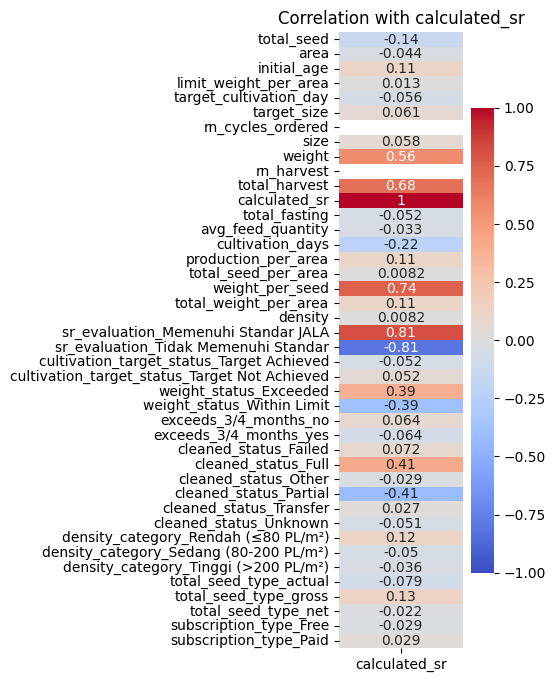

In [33]:
df_numeric = data.select_dtypes(include=['float64', 'int64', 'bool'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Select the column 'calculated_sr' and its correlation with others
calculated_sr_correlation = correlation_matrix[['calculated_sr']]

# Plot the heatmap for calculated_sr correlation
plt.figure(figsize=(2, 8))
sns.heatmap(calculated_sr_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation with calculated_sr')
plt.show()

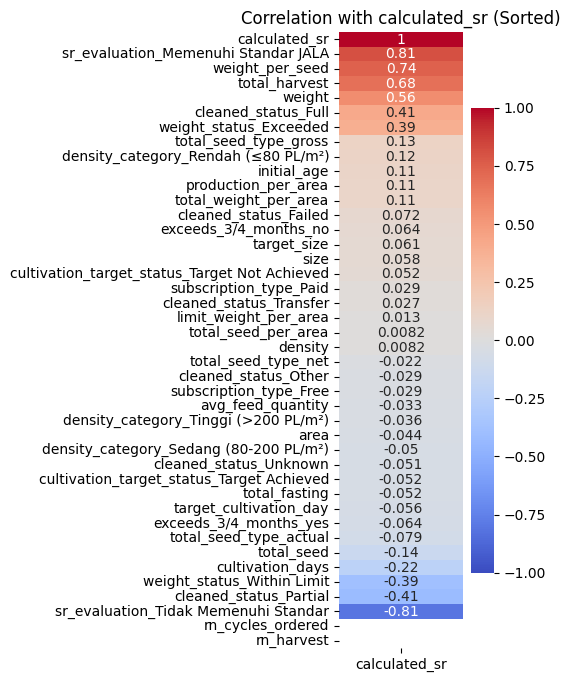

In [34]:
# Sort the correlation values in descending order
sorted_correlation = calculated_sr_correlation.sort_values(by='calculated_sr', ascending=False)

# Plot the heatmap for sorted correlation with calculated_sr
plt.figure(figsize=(2, 8))
sns.heatmap(sorted_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation with calculated_sr (Sorted)')
plt.show()

In [35]:
sorted_correlation

,calculated_sr
calculated_sr,1.000000
sr_evaluation_Memenuhi Standar JALA,0.806798
weight_per_seed,0.744072
total_harvest,0.683448
weight,0.560070
cleaned_status_Full,0.414659
weight_status_Exceeded,0.387200
total_seed_type_gross,0.129368
density_category_Rendah (≤80 PL/m²),0.122617
initial_age,0.114117


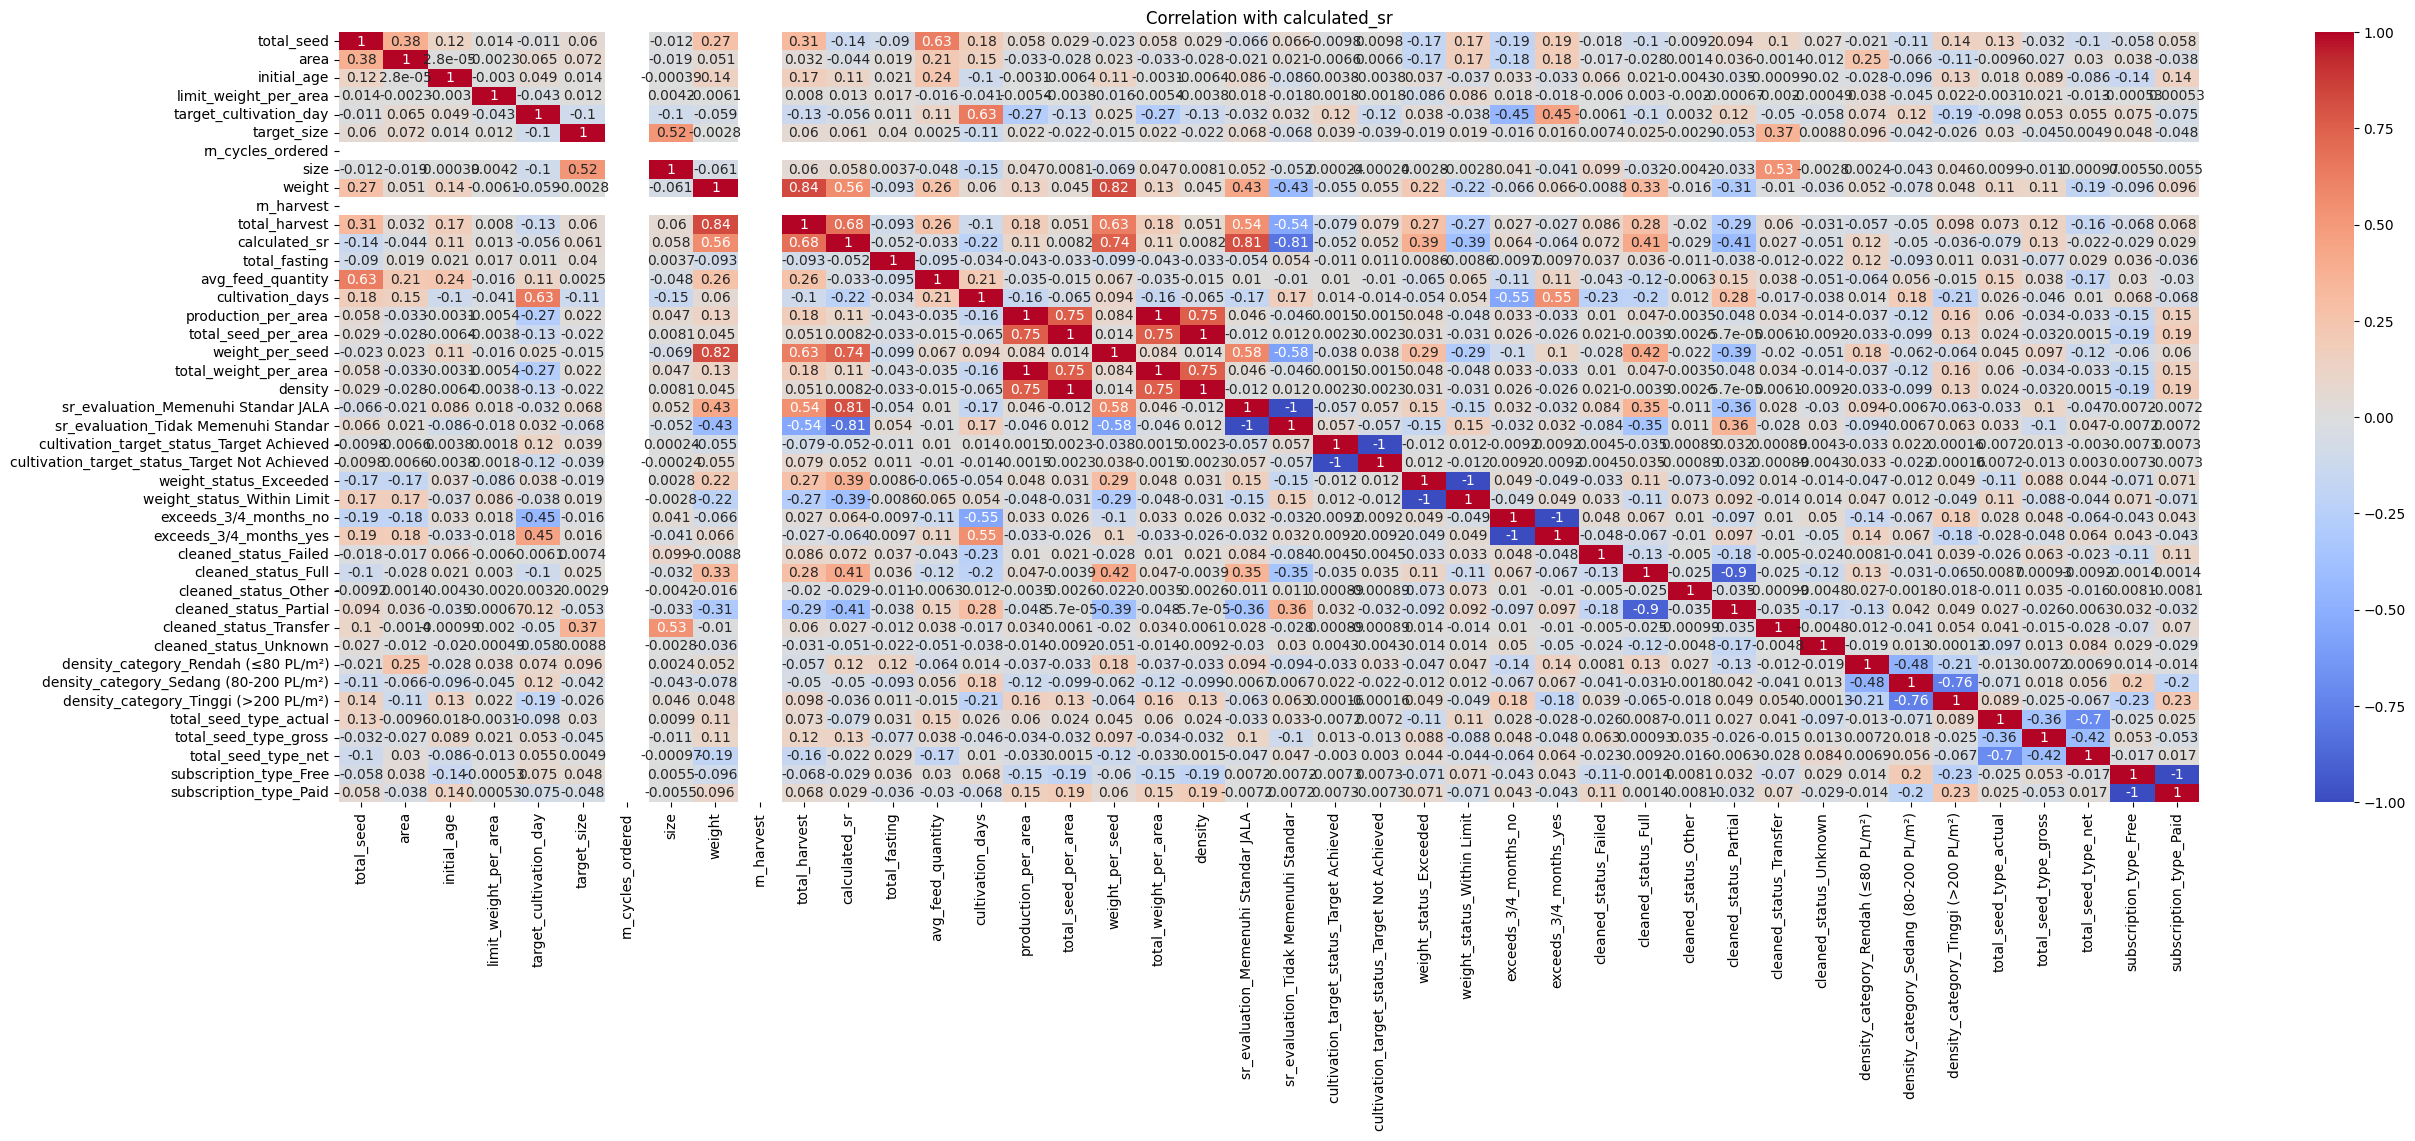

In [36]:
df_numeric = data.select_dtypes(include=['float64', 'int64', 'bool'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Select the column 'calculated_sr' and its correlation with others
calculated_sr_correlation = correlation_matrix

# Plot the heatmap for calculated_sr correlation
plt.figure(figsize=(30, 10))
sns.heatmap(calculated_sr_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation with calculated_sr')
plt.show()

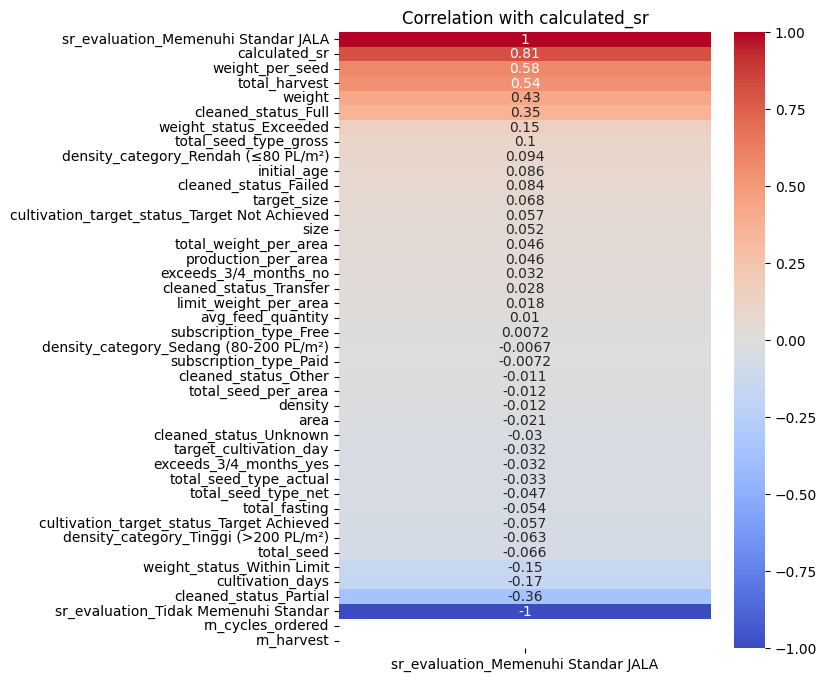

In [37]:
calculated_sr_correlation = correlation_matrix[['sr_evaluation_Memenuhi Standar JALA']].sort_values(by='sr_evaluation_Memenuhi Standar JALA', ascending=False)
# Plot the heatmap for calculated_sr correlation
plt.figure(figsize=(6, 8))
sns.heatmap(calculated_sr_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation with calculated_sr')
plt.show()

## Wrapper Methods

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Pilih 5 fitur terbaik
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['sr_evaluation_Memenuhi Standar JALA',
       'sr_evaluation_Tidak Memenuhi Standar', 'weight_status_Within Limit',
       'subscription_type_Free', 'subscription_type_Paid'],
      dtype='object')


## Tree-Based Models

In [39]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance

,Feature,Importance
19,sr_evaluation_Memenuhi Standar JALA,3.368016e-01
20,sr_evaluation_Tidak Memenuhi Standar,3.129776e-01
16,weight_per_seed,2.134022e-01
7,size,4.168775e-02
17,total_weight_per_area,2.887898e-02
14,production_per_area,2.458126e-02
15,total_seed_per_area,1.390741e-02
18,density,1.310349e-02
10,total_harvest,5.209386e-03
0,total_seed,3.111815e-03


## Cek Multikolinearitas

In [40]:
X = df[['density_category_Rendah (≤80 PL/m²)', 'total_seed_type_gross', 'weight_per_seed', 'initial_age', 'exceeds_3/4_months_no', 'target_size', 'total_seed_per_area', 'density']]
y = df['calculated_sr']

In [41]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming the dataset is already loaded as `df`
# Define features (X) and target (y)
X = df[['density_category_Rendah (≤80 PL/m²)', 'total_seed_type_gross', 'weight_per_seed',
        'initial_age', 'exceeds_3/4_months_no', 'target_size', 'total_seed_per_area', 'density']]

# Convert boolean columns to numeric (int) before calculating VIF
# This is to avoid the TypeError related to 'isfinite'
for col in X.select_dtypes(include=['bool', 'object']).columns:
    X[col] = X[col].astype(int)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

<ipython-input-41-b73b50d6a27c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(int)
<ipython-input-41-b73b50d6a27c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(int)
<ipython-input-41-b73b50d6a27c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,Feature,VIF
0,density_category_Rendah (≤80 PL/m²),1.200928
1,total_seed_type_gross,1.234315
2,weight_per_seed,1.511086
3,initial_age,1.040641
4,exceeds_3/4_months_no,5.481818
5,target_size,5.675747
6,total_seed_per_area,inf
7,density,inf


# Feature Scalling & Data Splitting

In [42]:
from pycaret.regression import *

data_scaled = df[['density_category_Rendah (≤80 PL/m²)', 'total_seed_type_gross',
                  'weight_per_seed', 'initial_age', 'exceeds_3/4_months_no',
                  'target_size', 'total_seed_per_area', 'calculated_sr']]

In [43]:
# Setup PyCaret untuk regression task
exp = setup(data=data_scaled, target='calculated_sr', session_id=42, normalize=True)

,Description,Value
0,Session id,42
1,Target,calculated_sr
2,Target type,Regression
3,Original data shape,"(5037, 8)"
4,Transformed data shape,"(5037, 8)"
5,Transformed train set shape,"(3525, 8)"
6,Transformed test set shape,"(1512, 8)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [44]:
# Lakukan pemodelan dan pilih model terbaik
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,6.6902,129.6521,11.3584,0.7430,0.4252,0.4354,0.3640
gbr,Gradient Boosting Regressor,6.9107,129.7079,11.3597,0.7429,0.4488,0.4514,0.2290
rf,Random Forest Regressor,6.7670,137.5806,11.6898,0.7277,0.4103,0.4210,0.7980
xgboost,Extreme Gradient Boosting,6.8871,140.5940,11.8217,0.7219,0.4472,0.4396,0.0980
et,Extra Trees Regressor,7.1173,154.6414,12.3767,0.6943,0.4284,0.4321,0.5310
knn,K Neighbors Regressor,7.3132,156.3511,12.4817,0.6902,0.4726,0.4800,0.0340
ada,AdaBoost Regressor,10.5890,204.9679,14.2896,0.5939,0.7592,0.8670,0.0880
ridge,Ridge Regression,9.9282,210.3829,14.4856,0.5834,1.0232,1.2528,0.0410
lr,Linear Regression,9.9277,210.3836,14.4857,0.5834,1.0231,1.2525,0.5210
lar,Least Angle Regression,9.9277,210.3836,14.4857,0.5834,1.0231,1.2525,0.0250


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [45]:
best_model

LGBMRegressor(n_jobs=-1, random_state=42)

In [46]:
# Tuning model (opsional)
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.5478,117.6236,10.8454,0.7559,0.4873,0.4942
1,7.5126,144.2508,12.0104,0.7269,0.5108,0.5135
2,6.3975,114.9125,10.7197,0.7258,0.4249,0.4336
3,7.3991,165.9169,12.8809,0.6747,0.4600,0.4766
4,6.7394,141.8193,11.9088,0.7060,0.4348,0.3986
5,6.4348,118.1396,10.8692,0.7804,0.4676,0.4581
6,7.3212,137.3165,11.7182,0.7344,0.4835,0.4707
7,6.4388,124.3149,11.1497,0.7701,0.4160,0.4416
8,6.4412,119.4861,10.9310,0.7553,0.4444,0.4839


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


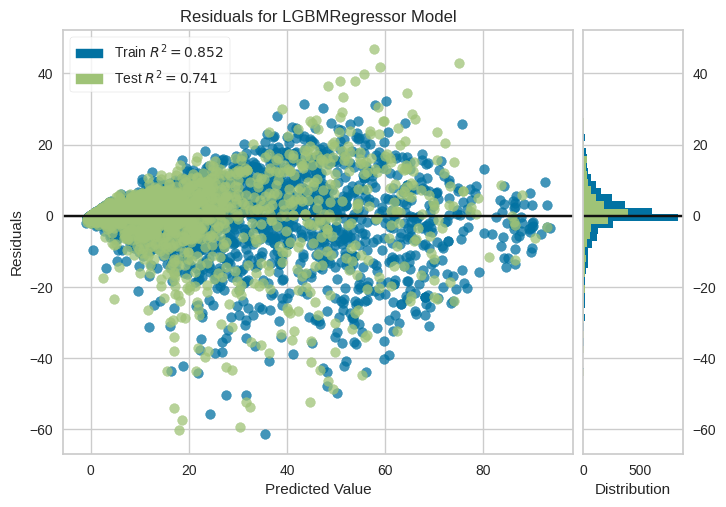

In [47]:
plot_model(tuned_model)

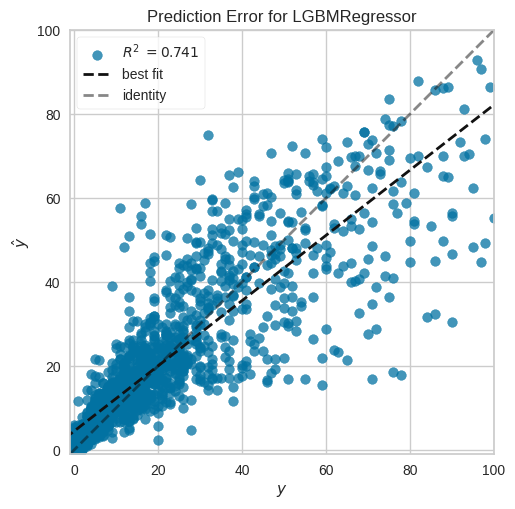

In [48]:
plot_model(tuned_model, plot = 'error')

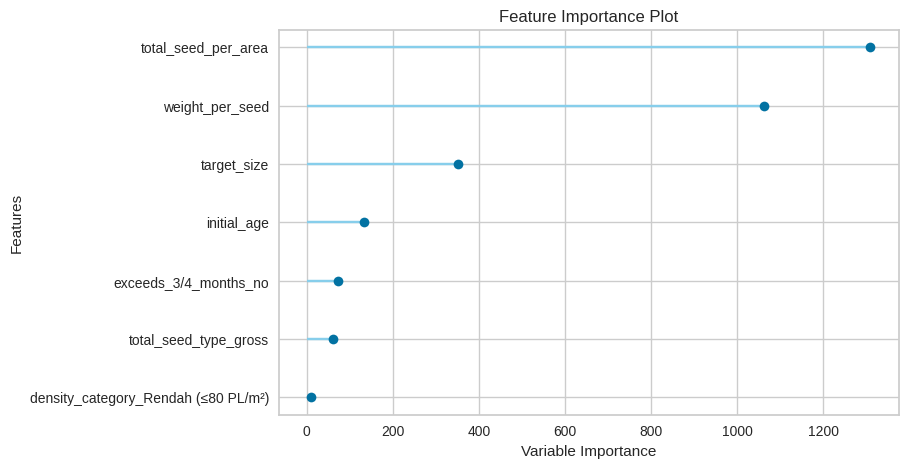

In [49]:
plot_model(tuned_model, plot='feature')

In [50]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [51]:
final_lightgbm = finalize_model(tuned_model)
final_lightgbm

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['weight_per_seed', 'initial_age',
                                             'target_size',
                                             'total_seed_per_area'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=42))])

In [52]:
print(final_lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['weight_per_seed', 'initial_age',
                                             'target_size',
                                             'total_seed_per_area'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=42))])


In [53]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6.4392,117.6385,10.8461,0.7406,0.4396,0.4504


,density_category_Rendah (≤80 PL/m²),total_seed_type_gross,weight_per_seed,initial_age,exceeds_3/4_months_no,target_size,total_seed_per_area,calculated_sr,prediction_label
4792,False,True,0.004999,0.0,True,55.0,222.733337,57.0,36.455487
3238,True,False,0.017527,0.0,False,55.0,55.001099,41.0,41.257377
2833,False,False,0.000245,0.0,True,55.0,477.585327,5.0,3.903051
3048,False,False,0.005376,0.0,True,55.0,186.000000,70.0,45.632887
3309,False,False,0.002089,0.0,False,40.0,114.734299,17.0,12.638000
...,...,...,...,...,...,...,...,...,...
1033,False,True,0.001615,0.0,True,55.0,94.090912,11.0,14.645955
1097,False,True,0.000841,0.0,True,55.0,107.090912,8.0,11.420761
1469,False,False,0.000390,0.0,True,55.0,118.005951,2.0,3.998534
543,False,False,0.000533,0.0,True,30.0,300.000000,4.0,7.663958


In [54]:
save_model(final_lightgbm,'Final Lightgbm Model Jan2025')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['weight_per_seed', 'initial_age',
                                              'target_size',
                                              'total_seed_per_area'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  LGBMRegressor(n_jobs=-1, random_state=42))]),
 'Final Lightgbm Model Jan2025.pkl')